# PCA | wine_data

Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [49]:
df=pd.read_csv('wine.csv')

In [50]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [51]:
df.shape

(178, 14)

#### Data Preprocessing

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


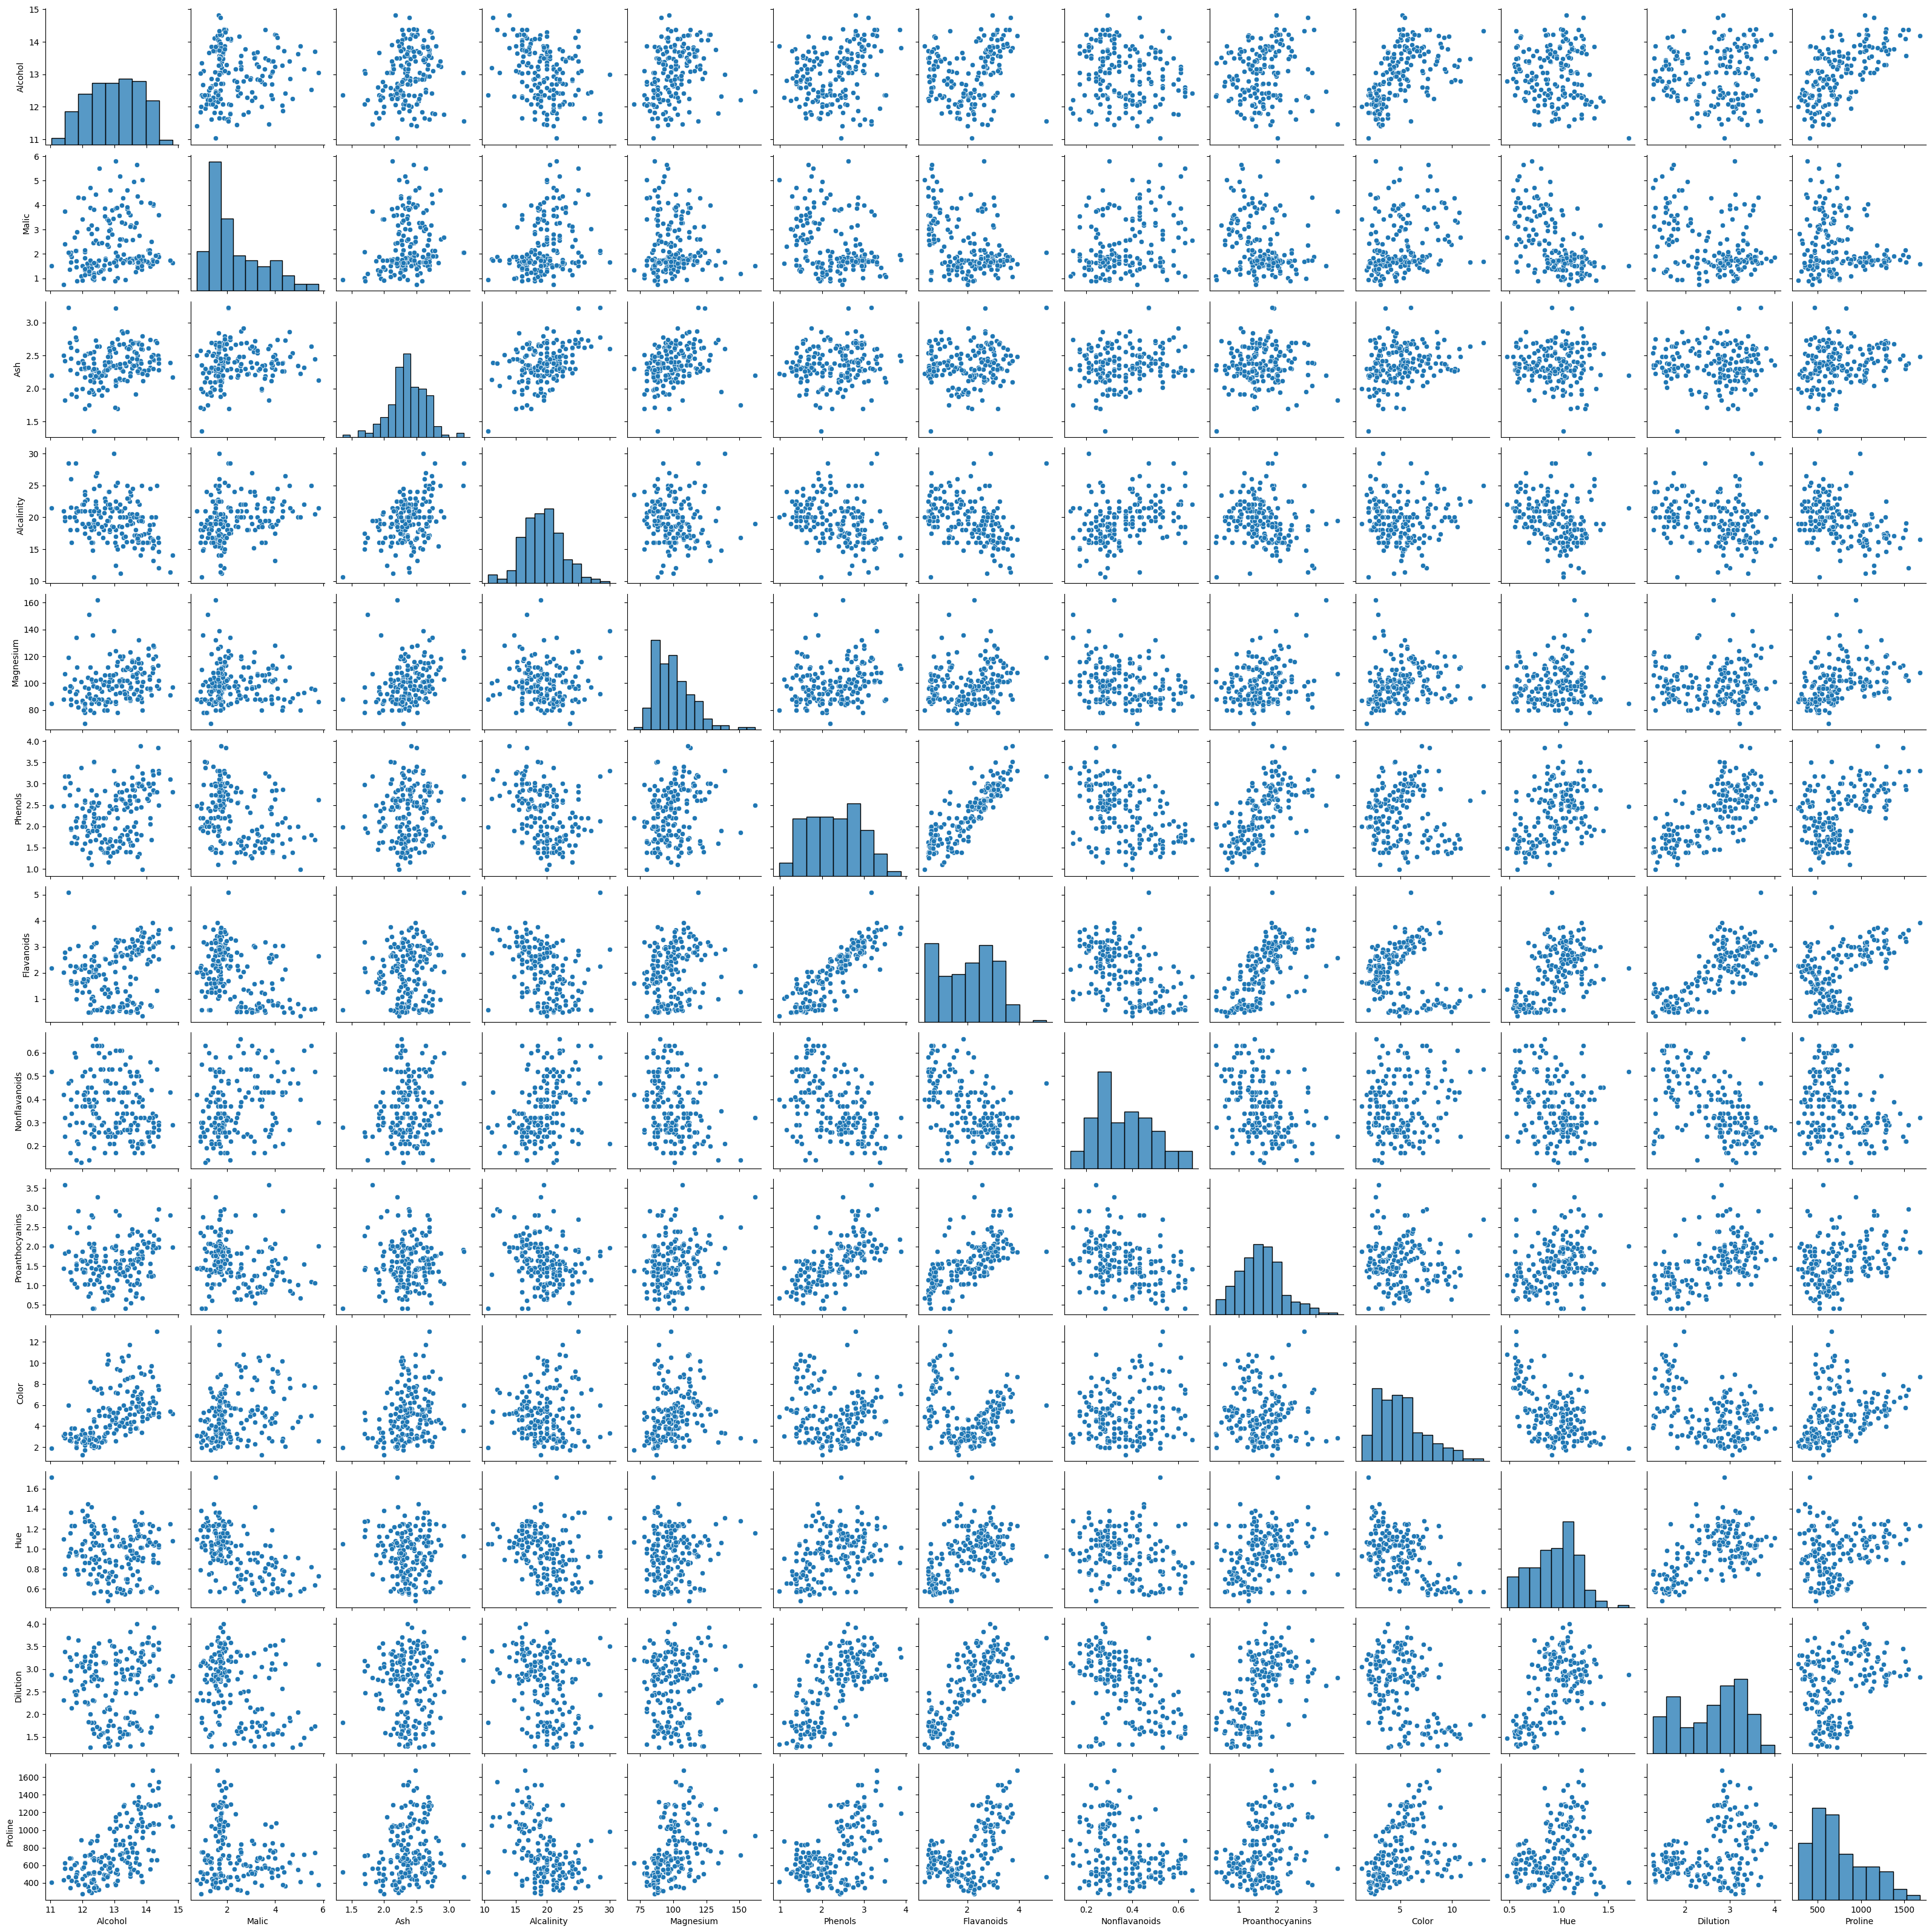

In [34]:
sns.pairplot(df_scaled)

#### Normalization :Min-Max_Scaling

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=df.iloc[:,1:]
for column in df_scaled.columns:
    df_scaled[column]=scaler.fit_transform(df_scaled[[column]])

In [71]:
df_scaled.shape

(178, 13)

In [208]:
df_scaled.head()

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  0.842105  0.191700  0.572193    0.257732   0.619565  0.627586    0.573840   
1  0.571053  0.205534  0.417112    0.030928   0.326087  0.575862    0.510549   
2  0.560526  0.320158  0.700535    0.412371   0.336957  0.627586    0.611814   
3  0.878947  0.239130  0.609626    0.319588   0.467391  0.989655    0.664557   
4  0.581579  0.365613  0.807487    0.536082   0.521739  0.627586    0.495781   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0       0.283019         0.593060  0.372014  0.455285  0.970696  0.561341  
1       0.245283         0.274448  0.264505  0.463415  0.780220  0.550642  
2       0.320755         0.757098  0.375427  0.447154  0.695971  0.646933  
3       0.207547         0.558360  0.556314  0.308943  0.798535  0.857347  
4       0.490566         0.444795  0.259386  0.455285  0.608059  0.325963

### PCA

In [74]:
from sklearn.decomposition import PCA

In [135]:
pca=PCA(n_components=13)
df_pca=pca.fit_transform(df_pca)
df_pca

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [101]:
df_pca3=pd.DataFrame(df_pca[:,0:3],columns=['PC1','PC2','PC3'])
df_pca3.head()

PC1       PC2       PC3
0 -0.706336 -0.253193  0.024093
1 -0.484977 -0.008823 -0.280482
2 -0.521172 -0.189187  0.196217
3 -0.821644 -0.580906  0.081110
4 -0.202546 -0.059467  0.300240

In [86]:
#Variance ratio
variance=pca.explained_variance_ratio_
variance

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [89]:
cum_variance=np.cumsum(variance*100)
cum_variance

array([ 40.74948456,  59.71983634,  68.28150696,  75.70818476,
        81.27348586,  85.93232305,  89.59625195,  92.00504125,
        94.27941178,  96.53037634,  97.91166882,  99.18490474,
       100.        ])

#### Variance Plot

In [120]:
import plotly.io as pio
pio.renderers.default='notebook'

In [121]:
import plotly.express as px
fig=px.line(cum_variance,markers=True,width=500,height=400)
fig.update_layout(yaxis_title='cumulative variance',xaxis_title='Numbers of components')
fig.show()

**_The first principle component explains 59.7% of variance in the dataset  
First three principle components capture/explain 68.2% of the total variance in the data given_**

####  Scree plot

In [144]:
eigen_values=pca.explained_variance_ratio_
fig1=px.line(eigen_values,height=350,markers=True)
fig1.update_layout(yaxis_title='Eigen values',xaxis_title='Numbers of components')


#### _The curve starts flattening after 2 principle components .Choosing 3 to 7 principle components can be a good choice. But as per the problem statements lets choose 3_

### Visualization of first three principle components against Type

In [130]:
df_pca_final=pd.concat([df_pca3,df.Type],axis=1)
px.scatter(df_pca3,color=df.Type,width=500,height=400)

**_All three types are well classified_**

## PCA + Clustering
### Using first three Principle components PC1,PC2,PC3

In [147]:
data=df_pca3.copy()
data.head()

PC1       PC2       PC3
0 -0.706336 -0.253193  0.024093
1 -0.484977 -0.008823 -0.280482
2 -0.521172 -0.189187  0.196217
3 -0.821644 -0.580906  0.081110
4 -0.202546 -0.059467  0.300240

#### Dendrogram with first three principle components

In [151]:
import scipy.cluster.hierarchy as sch

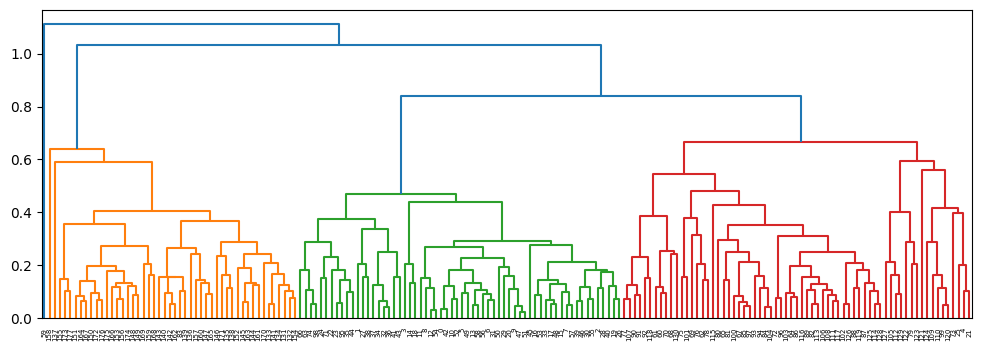

In [155]:
plt.figure(figsize=(12,4))
sch.dendrogram(sch.linkage(data,method='average',metric='euclidean'));

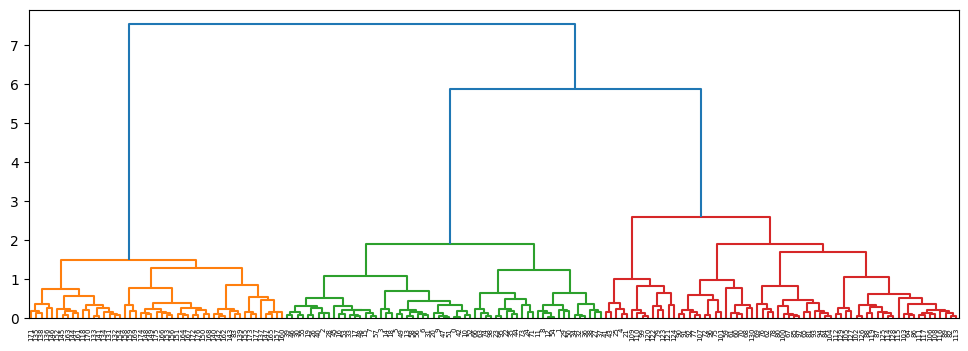

In [156]:
plt.figure(figsize=(12,4))
sch.dendrogram(sch.linkage(data,method='ward',metric='euclidean'));

#### Dendrogram with original data

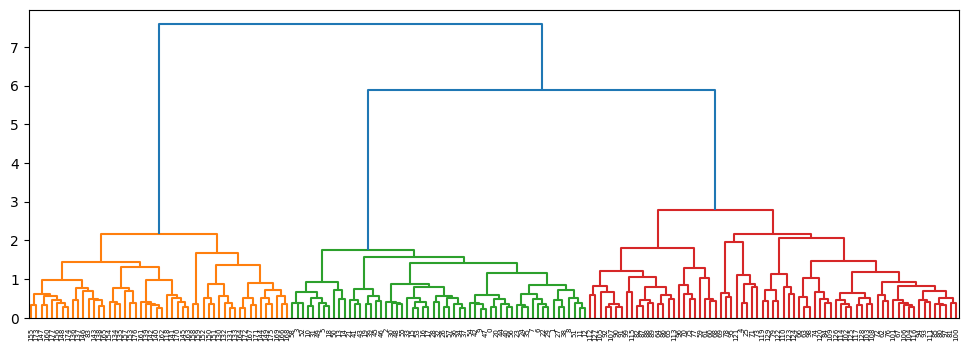

In [215]:
plt.figure(figsize=(12,4))
sch.dendrogram(sch.linkage(df_scaled,method='ward',metric='euclidean'));

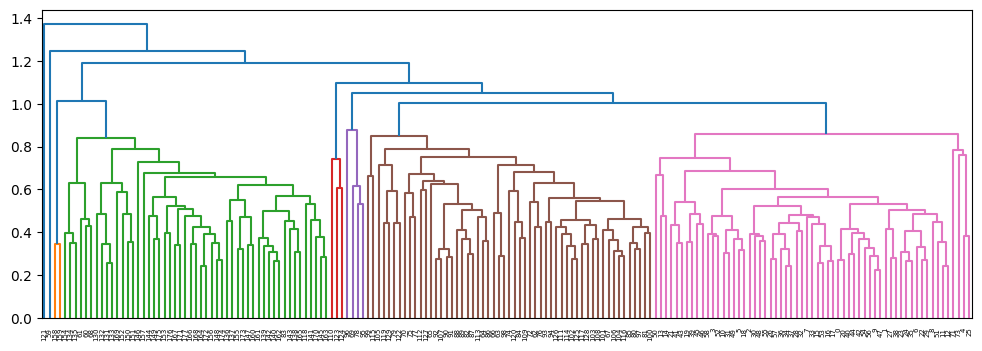

In [217]:
plt.figure(figsize=(12,4))
sch.dendrogram(sch.linkage(df_scaled,method='average',metric='euclidean'));

**_With 'ward' and 'average' linkage method we are getting 3 clusters with first 3 principle components and original data as well..  
Lets do Agglomeratic clustering_ and check metrics SS and DBI**

In [175]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [184]:
# linkage = 'ward'
cluster_h=AgglomerativeClustering(n_clusters=3,linkage='ward',metric='euclidean').fit(data)
cluster_h.labels_
labels_h=pd.Series(cluster_h.labels_)
print(' SS = ',silhouette_score(data,labels_h),'\n','DBI = ',davies_bouldin_score(data,labels_h))

 SS =  0.45962817084998897 
 DBI =  0.8202164596219527


In [186]:
# linkage = 'average'
cluster_h=AgglomerativeClustering(n_clusters=3,linkage='average',metric='euclidean').fit(data)
cluster_h.labels_
labels_h1=pd.Series(cluster_h.labels_)
print(' SS = ',silhouette_score(data,labels_h1),'\n','DBI = ',davies_bouldin_score(data,labels_h1))

 SS =  0.3905447482849229 
 DBI =  0.7024323885189959


#### SS and DBI of Agglomeratic clustering with Original data

In [247]:
# linkage = 'ward'
cluster_ho=AgglomerativeClustering(n_clusters=3,linkage='ward',metric='euclidean').fit(df_scaled)
cluster_ho.labels_
labels_ho=pd.Series(cluster_ho.labels_)
print(' SS = ',silhouette_score(df_scaled,labels_ho),'\n','DBI = ',davies_bouldin_score(df_scaled,labels_h))

 SS =  0.2948290632158541 
 DBI =  1.3507231251357839


#### Visualization Clusters developed by first three principle components

In [193]:
df_cluster_h=data.copy()
df_cluster_h['cluster']=labels_h
df_cluster_h

PC1       PC2       PC3  cluster
0   -0.706336 -0.253193  0.024093        2
1   -0.484977 -0.008823 -0.280482        2
2   -0.521172 -0.189187  0.196217        2
3   -0.821644 -0.580906  0.081110        2
4   -0.202546 -0.059467  0.300240        0
..        ...       ...       ...      ...
173  0.739510 -0.471901  0.209360        1
174  0.581781 -0.348366  0.083590        1
175  0.626313 -0.546857 -0.030495        1
176  0.572991 -0.425516 -0.094537        1
177  0.701764 -0.513505  0.293910        1

[178 rows x 4 columns]

In [191]:
df_cluster_h['cluster'].value_counts()

0    68
2    61
1    49
Name: cluster, dtype: int64

In [192]:
px.scatter_3d(df_cluster_h,x='PC1',y="PC2",z="PC3",color='cluster')

### Observation
**_--Optimum number of clusters with first three principle components and original are same and n_clusters=3  
--The silhouette_score is improved from  .294 to .4956 with principle components_  
--DBI has decreased to .7 from 1.35**

In [197]:
# In original Data
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

#### With Original data and first 3 principle components we obtain similar number of clusters

## KMeans Clustering

#### Check for optimum number of clusters using first 3 principle components and original data

**With PC1,PC2 and PC3**

In [221]:
# Check for optimum number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2,n_init=10)
    kmeans.fit(df_pca3)
    wcss.append(kmeans.inertia_)

In [250]:
fig2=px.line(wcss,height=350,markers=True)
fig2.update_layout(yaxis_title='n_clusters')


**With original data**

In [223]:
# Check for optimum number of clusters
from sklearn.cluster import KMeans
wcss1=[]
for i in range (1,6):
    kmeans1=KMeans(n_clusters=i,random_state=2,n_init=10)
    kmeans1.fit(df_scaled)
    wcss1.append(kmeans1.inertia_)

In [224]:
px.line(wcss1,height=350)

***With first 3 principle components and original data we are gettind similar inertia curve but with different scaling of inertia.  
with original data wcss is around 50 and with first three principlel components it has reduced to 19**

### Kmeans cluster with n_clusters =3

In [234]:
kmeans2=KMeans(n_clusters=3,random_state=2,n_init=10)
kmeans2.fit(df_pca3)

KMeans(n_clusters=3, n_init=10, random_state=2)

In [235]:
k_labels=kmeans2.labels_

In [236]:
k_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [237]:
silhouette_score(df_pca3,k_labels)

0.4779662656834766

In [244]:
davies_bouldin_score(df_pca3,k_labels)

0.7896451022492323

In [238]:
silhouette_score(df_scaled,k_labels)

0.2997081530816115

In [246]:
davies_bouldin_score(df_scaled,k_labels)

1.321049105842404

In [242]:
df_kmeans=df_pca3.copy()
df_kmeans['cluster']=k_labels
df_kmeans.head()

PC1       PC2       PC3  cluster
0 -0.706336 -0.253193  0.024093        1
1 -0.484977 -0.008823 -0.280482        1
2 -0.521172 -0.189187  0.196217        1
3 -0.821644 -0.580906  0.081110        1
4 -0.202546 -0.059467  0.300240        1

#### Visualization of Kmeans clusters using n_clusters=3

In [243]:
px.scatter_3d(df_kmeans,x='PC1',y="PC2",z="PC3",color='cluster')

### Observation
**_Silhouette_score has increased and DBI has decreased while clustering using firdt three principle components.  
i.e. Model performance has improved with first 3 principle components_**

## Summary

**_1-For heirarchical modelling with linkage='ward', the optimum number of clusters are 3 and equal with both original data and first three principle components.  
2-For Kmeans clustering the Elbow method shows similar curve with increased wcss for original data .Thus the optimum number of clusters are same (n_cluster>=2) with original data and first 3 principle components  
3-The model performance has improved using first 3 principle components with increased silhouette score and decreased DBI_**
